# **1. Entendimiento del negocio**

La unidad de psicologia de un hospital universitario quiere entender los patrones y efectos sobre el uso de SmartPhones entre la poblacion joven, haciendo un enfoque especial en el nivel de adiccion al uso de este tipo de dispositivos. La intencion es entonces conocer cuales pueden ser los efectos en cuanto a la posibilidad de desarrollar cierto nivel de adiccion

# **2. Enfoque analitico**

Desarrollar un experimento de clasificacion para determinar niveles de adiccion a SmartPhones en poblacion juvenil con un desempeño esperado mayor al 85%

# **3. Requerimiento de datos**

- Datos de comportamiento de una muestra poblacional especifica
- Datos demograficos de la muestra poblacional
- Datos de habitos de la muestra poblacional
- Niveles de adiccion

# **4. Recoleccion de datos**

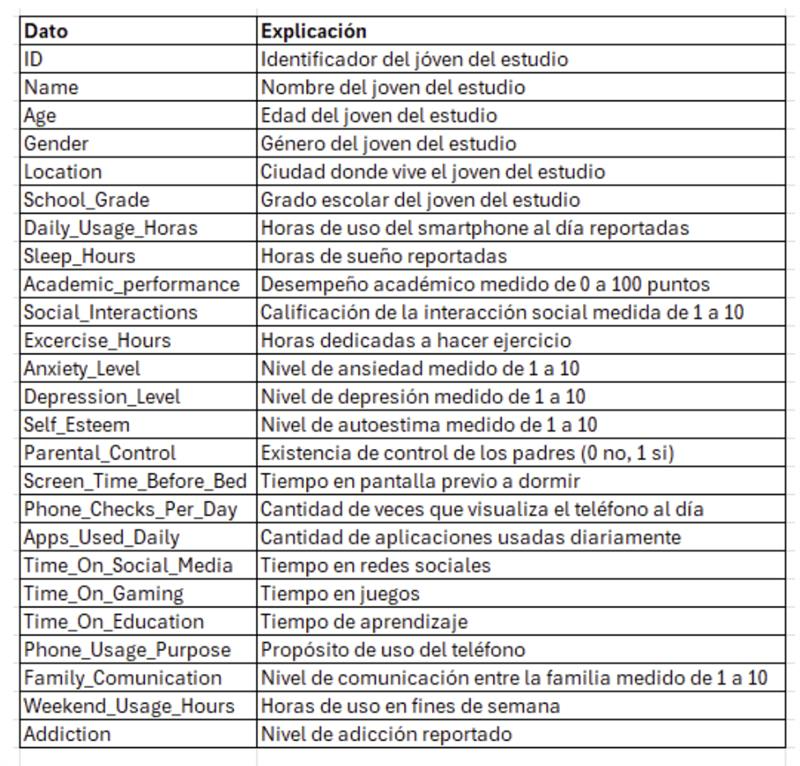

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Importar datos
data= pd.read_csv('data_clf.csv')
data

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78.0,5.0,...,1.4,86,19.0,3.6,1.7,1.2,Browsing,4.0,8.7,High
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70.0,5.0,...,0.9,96,9.0,1.1,4.0,1.8,Browsing,2.0,5.3,High
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93.0,8.0,...,0.5,137,8.0,0.3,1.5,0.4,Education,6.0,5.7,High
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78.0,8.0,...,1.4,128,7.0,3.1,1.6,0.8,Social Media,8.0,3.0,High
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56.0,4.0,...,1.0,96,20.0,2.6,0.9,1.1,Gaming,10.0,3.7,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,Jesus Yates,16,Female,New Jennifer,12th,3.9,6.4,53.0,4.0,...,0.3,80,15.0,2.7,1.8,1.0,NaN,8.0,9.4,High
2996,2997,Bethany Murray,13,Female,Richardport,8th,3.6,7.3,93.0,5.0,...,0.9,45,8.0,3.1,0.0,0.3,Gaming,9.0,5.2,Medium
2997,2998,Norman Hughes,14,Other,Rebeccaton,7th,3.2,6.5,98.0,1.0,...,0.2,51,13.0,2.4,0.2,2.4,Social Media,9.0,5.9,Medium
2998,2999,Barbara Hinton,17,Female,Ramirezmouth,9th,6.7,7.5,67.0,3.0,...,1.6,125,17.0,1.7,2.6,1.5,Browsing,4.0,6.1,High


# **5. Entendimiento de los datos**

- Identificacion de datos nulos
- Exploracion estadistica univariada, bivariada y multivariada
- Balance de la variable objetivo

In [4]:
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as msno

In [5]:
#Identificar tipo de variables y cantidad de datos nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       2900 non-null   float64
 7   Sleep_Hours             2900 non-null   float64
 8   Academic_Performance    2900 non-null   float64
 9   Social_Interactions     2900 non-null   float64
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           2900 non-null   float64
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        2900 non-null   

In [6]:
(data.isna().mean()*100).round(2)

ID                        0.00
Name                      0.00
Age                       0.00
Gender                    0.00
Location                  0.00
School_Grade              0.00
Daily_Usage_Hours         3.33
Sleep_Hours               3.33
Academic_Performance      3.33
Social_Interactions       3.33
Exercise_Hours            0.00
Anxiety_Level             3.33
Depression_Level          0.00
Self_Esteem               0.00
Parental_Control          3.33
Screen_Time_Before_Bed    0.00
Phone_Checks_Per_Day      0.00
Apps_Used_Daily           3.33
Time_on_Social_Media      0.00
Time_on_Gaming            3.33
Time_on_Education         0.00
Phone_Usage_Purpose       3.33
Family_Communication      3.33
Weekend_Usage_Hours       0.00
Addiction                 0.00
dtype: float64

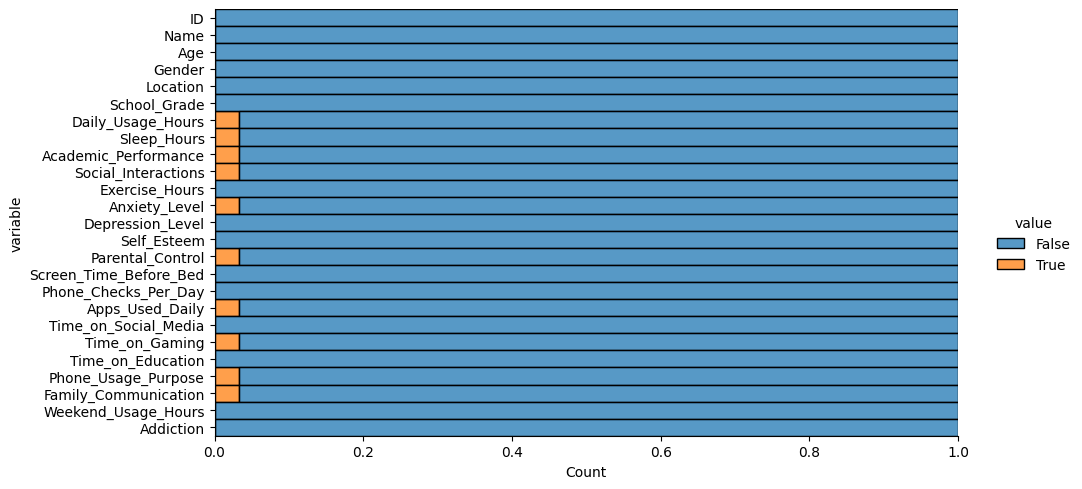

In [7]:
#Visualizar la proporcion de datos nulos por variable
data.isnull().melt().pipe(lambda df: sb.displot(data= df, y= 'variable', hue= 'value', multiple='fill', aspect=2))
plt.show()

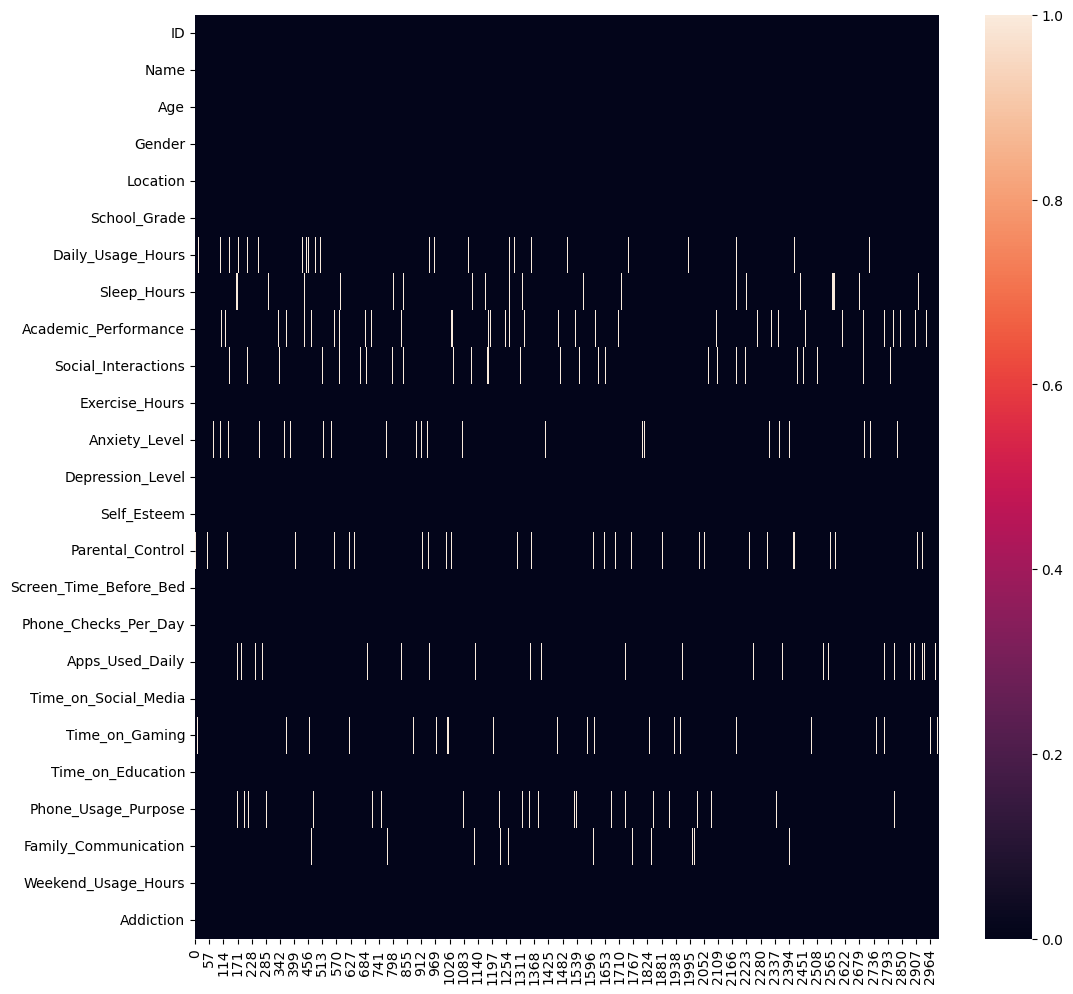

In [8]:
#Visualizar la dispersion de los datos nulos
plt.figure(figsize=(12,12))
data.isnull().transpose().pipe(lambda df: sb.heatmap(data = df))
plt.show()
#La nulidad esta dispersa, por lo tanto se descarta la eliminacion de nulos

<function matplotlib.pyplot.show(close=None, block=None)>

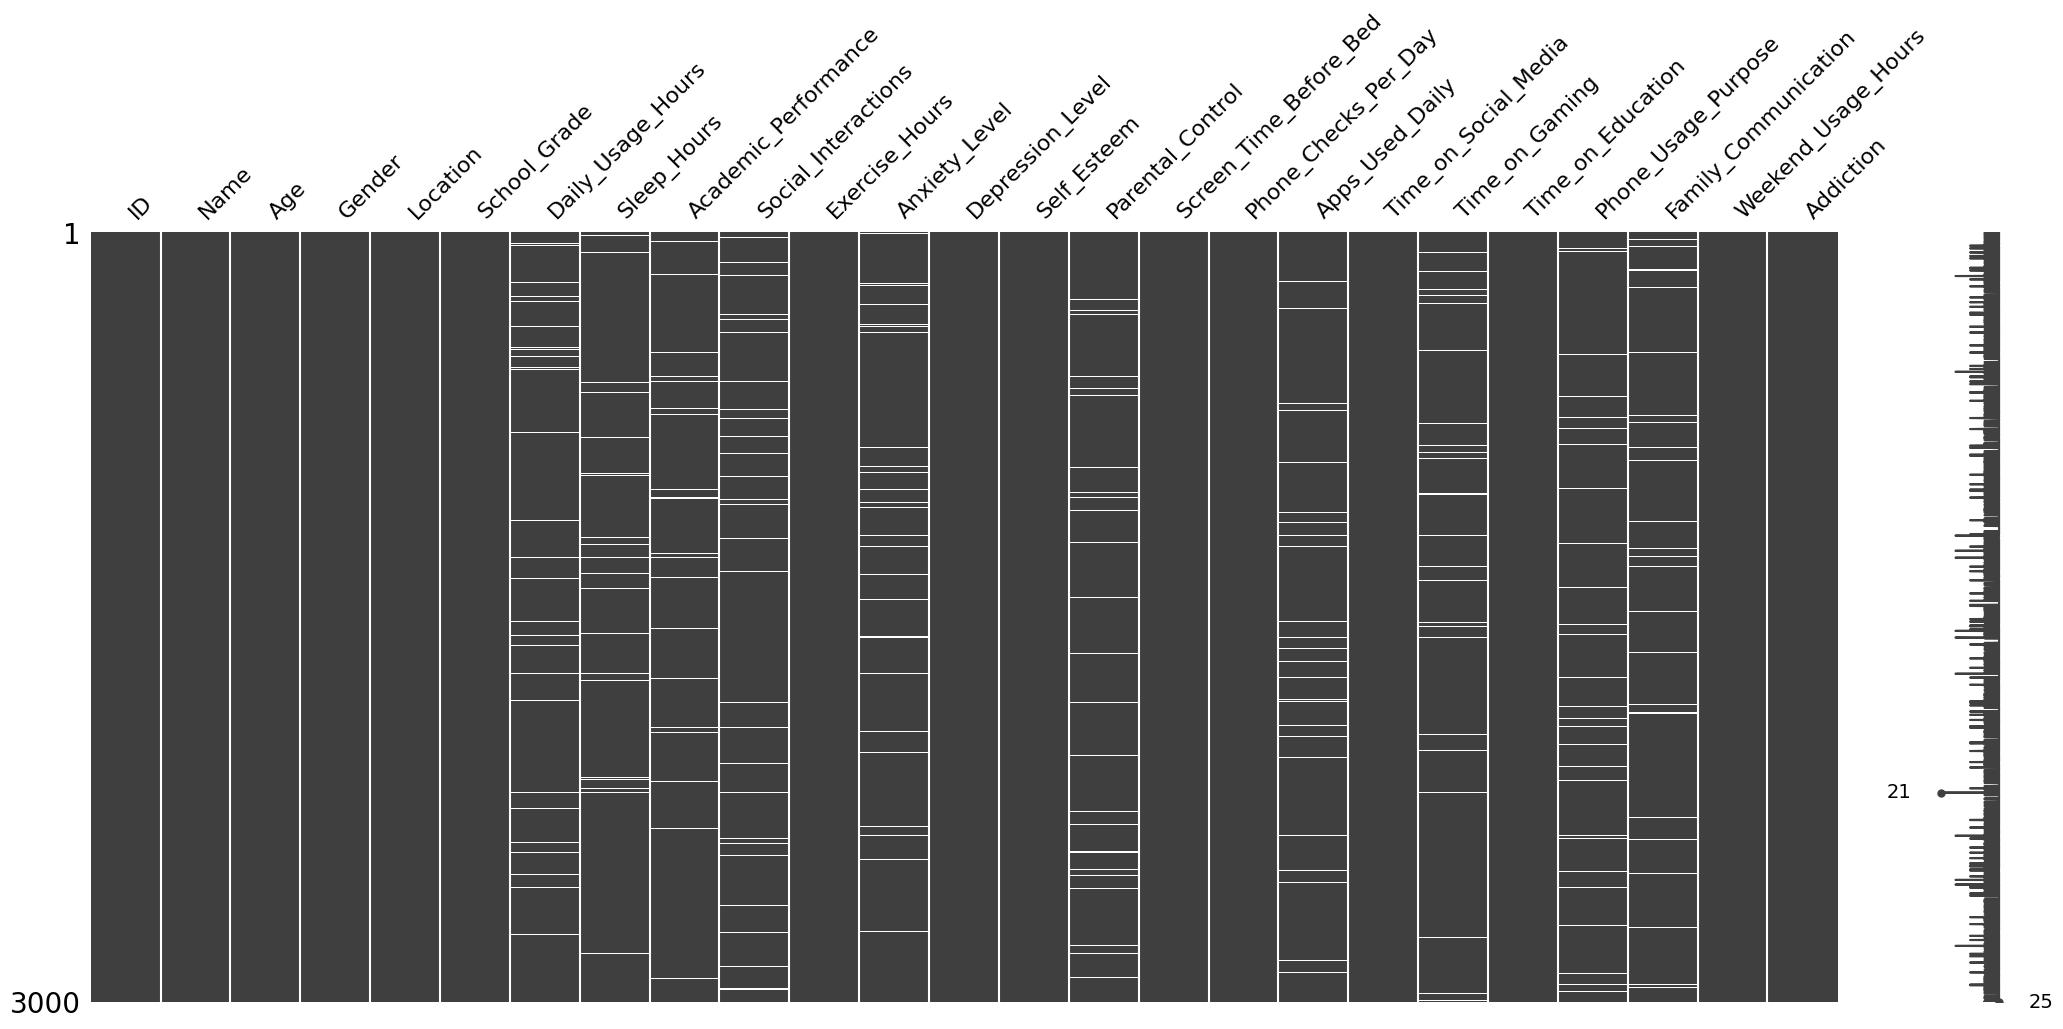

In [9]:
msno.matrix(data)
plt.show

<Axes: >

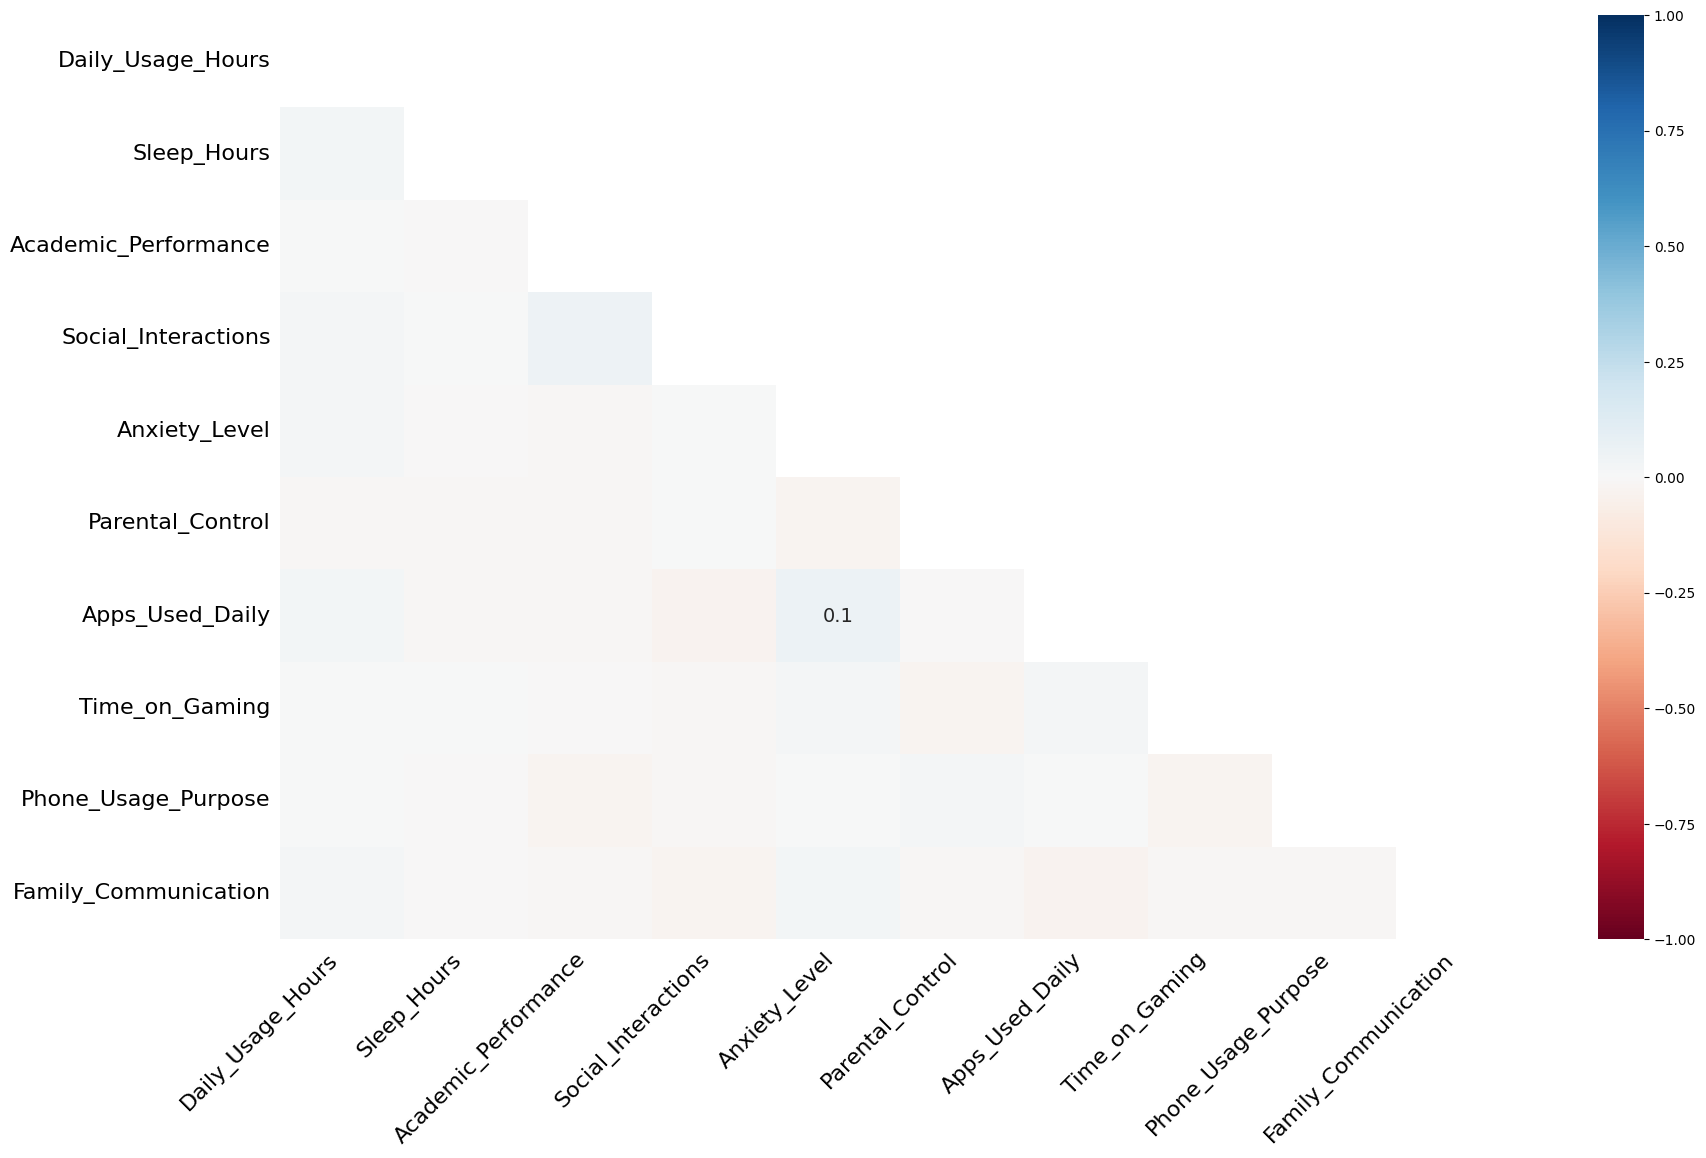

In [10]:
msno.heatmap(data)

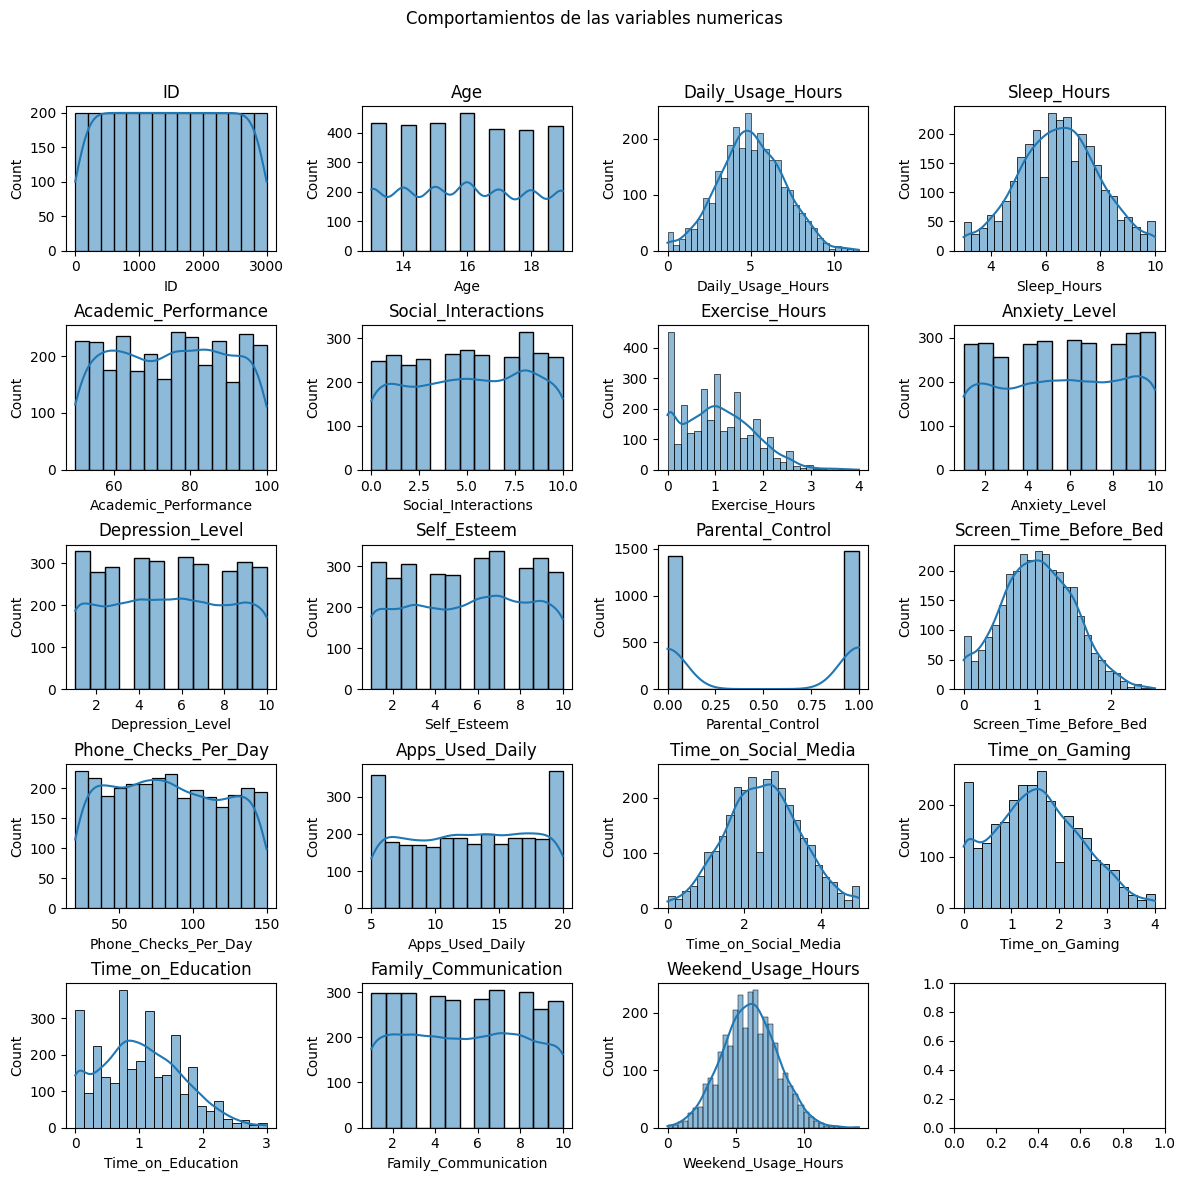

In [11]:
#Histogramas de frecuencia
fig, ax= plt.subplots(5, 4, figsize= (12,12))
ax= ax.flat
num_col= data.select_dtypes(include= ['int64', 'float64']).columns
for i, col in enumerate(num_col):
    sb.histplot(data= data, x= col, kde= True, ax= ax[i])
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top= 0.9)
fig.suptitle('Comportamientos de las variables numericas')
plt.show()

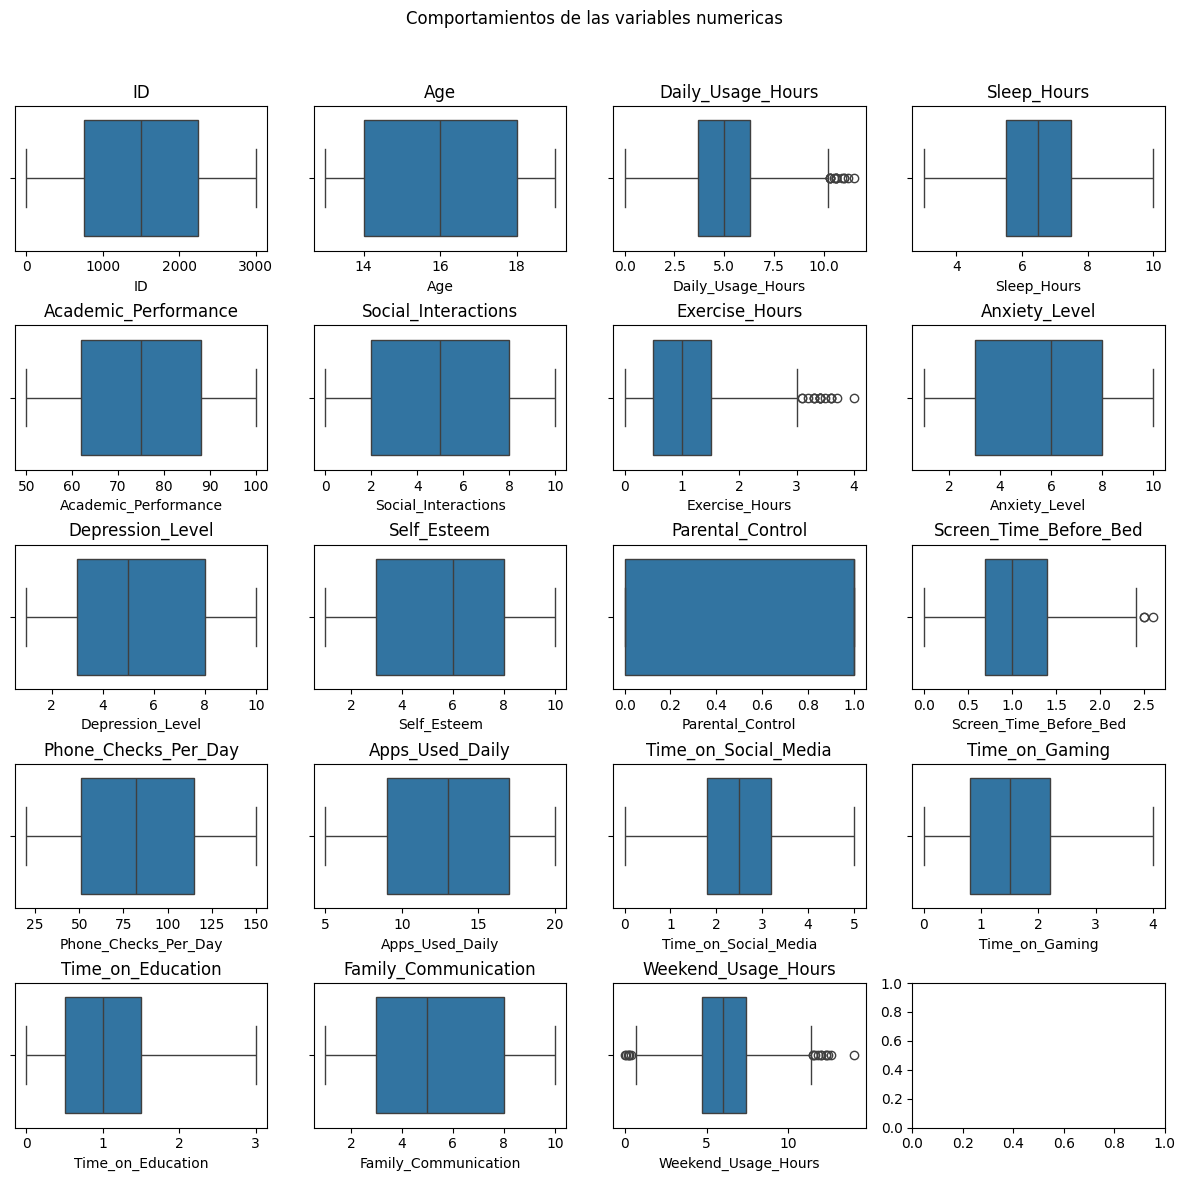

In [12]:
#Grafico de cajas y bigotes
fig, ax= plt.subplots(5, 4, figsize= (12,12))
ax= ax.flat
num_col= data.select_dtypes(include= ['int64', 'float64']).columns
for i, col in enumerate(num_col):
    sb.boxplot(data= data, x= col, ax= ax[i])
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top= 0.9)
fig.suptitle('Comportamientos de las variables numericas')
plt.show()